In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('hearing_test.csv')

In [5]:
 # 0 means no pass 1 means pass
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [6]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [7]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

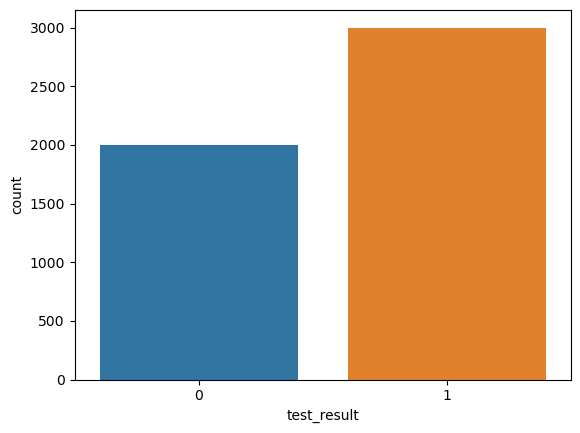

In [8]:
sns.countplot(data = df, x= 'test_result')

<Axes: xlabel='test_result', ylabel='age'>

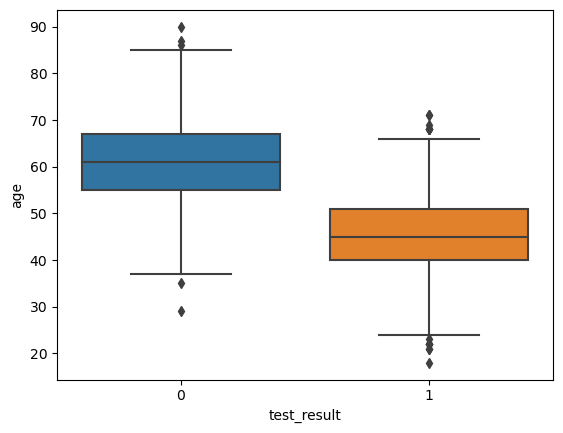

In [9]:
sns.boxplot(x= 'test_result', y = 'age', data = df)

The plot interprets that people who have higher age are less likely to pass the test and lower age people are passing the test in greater amount. 

<Axes: xlabel='test_result', ylabel='physical_score'>

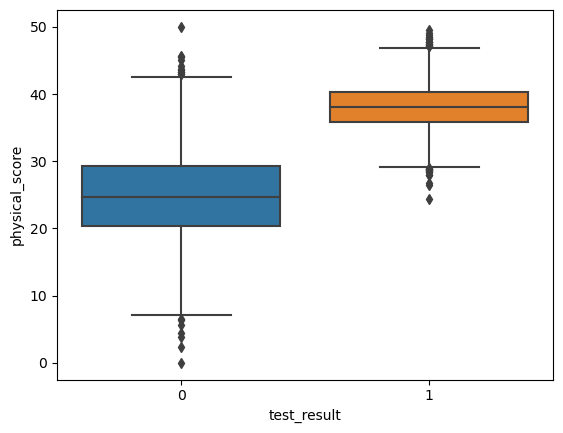

In [10]:
sns.boxplot(x= 'test_result', y = 'physical_score', data = df)

<Axes: xlabel='age', ylabel='physical_score'>

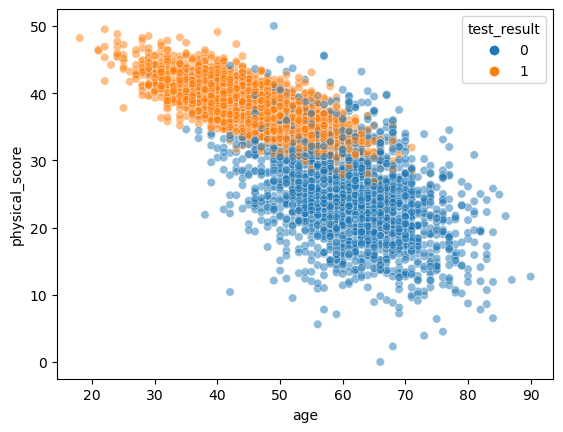

In [11]:
# the following pattern will show as the age increases the physical score goes down
sns.scatterplot(x = 'age', y = 'physical_score', 
                data = df, hue = 'test_result', alpha = 0.5)

C:\Users\Zahid\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


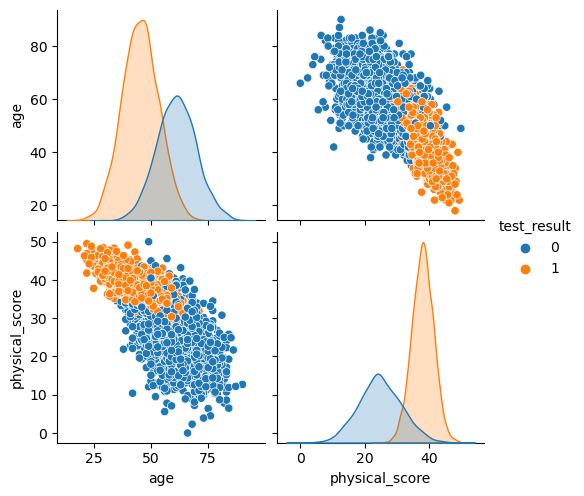

In [12]:
sns.pairplot(df, hue = 'test_result')

<Axes: >

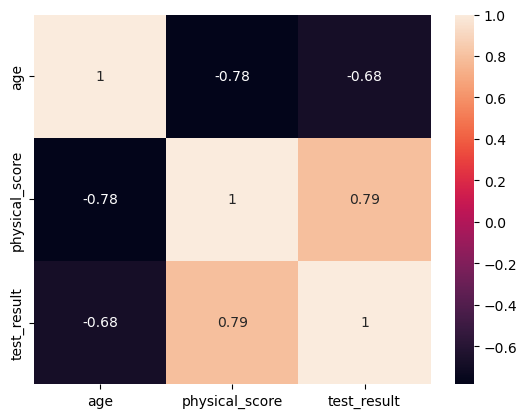

In [13]:
sns.heatmap(df.corr(), annot = True)

<Axes: xlabel='physical_score', ylabel='test_result'>

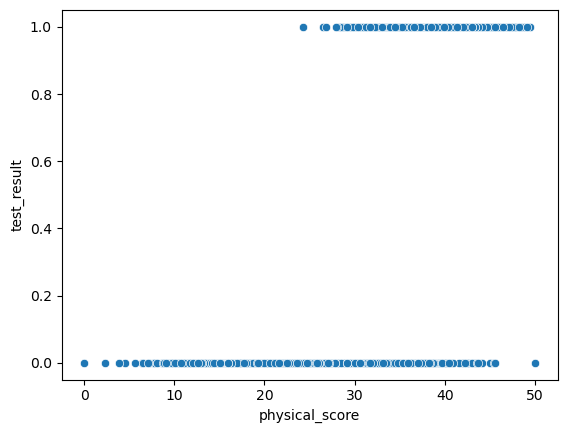

In [14]:
sns.scatterplot(x = 'physical_score', y = 'test_result', data = df)

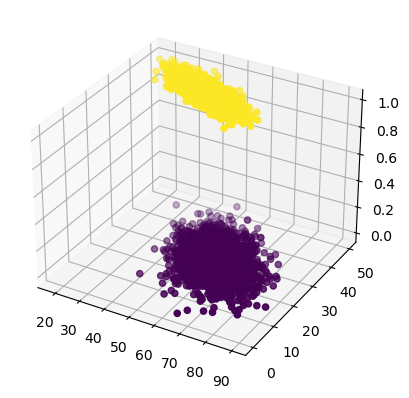

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'], c= df['test_result'])

# Training Data

In [16]:
X = df.drop('test_result', axis = 1)

In [17]:
y = df['test_result']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.1, random_state = 101 )


In [21]:
scaler = StandardScaler()

In [22]:
scaled_X_train = scaler.fit_transform(X_train)

In [23]:
scaled_X_test = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log_model = LogisticRegression()

In [26]:
log_model.fit(scaled_X_train, Y_train)

LogisticRegression()

In [27]:
log_model.coef_

array([[-0.95017725,  3.46148946]])

In [28]:
y_pred = log_model.predict(scaled_X_test)

In [29]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [30]:
y_pred_prob = log_model.predict_proba(scaled_X_test)

In [31]:
#left side value is probability to belong 0 class and right side for 1 class
y_pred_prob

array([[2.38051656e-02, 9.76194834e-01],
       [2.68854070e-02, 9.73114593e-01],
       [9.89220033e-01, 1.07799673e-02],
       [1.90238747e-03, 9.98097613e-01],
       [9.75065740e-01, 2.49342602e-02],
       [9.89676918e-01, 1.03230822e-02],
       [7.39558885e-02, 9.26044112e-01],
       [1.70641117e-02, 9.82935888e-01],
       [9.97075399e-01, 2.92460122e-03],
       [3.30092529e-02, 9.66990747e-01],
       [8.30393770e-02, 9.16960623e-01],
       [9.90796129e-03, 9.90092039e-01],
       [7.07374696e-03, 9.92926253e-01],
       [9.34320413e-01, 6.56795867e-02],
       [1.16096233e-04, 9.99883904e-01],
       [6.58212248e-02, 9.34178775e-01],
       [9.89155494e-01, 1.08445064e-02],
       [2.79291486e-03, 9.97207085e-01],
       [5.57001286e-04, 9.99442999e-01],
       [9.96534179e-01, 3.46582117e-03],
       [8.81902000e-01, 1.18098000e-01],
       [1.30963044e-01, 8.69036956e-01],
       [5.45789772e-01, 4.54210228e-01],
       [3.43636758e-02, 9.65636324e-01],
       [3.984685

# Performance Evaluation

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
Y_test

1718    1
2511    1
345     0
2521    1
54      0
       ..
4770    1
188     1
3335    0
4583    0
3208    0
Name: test_result, Length: 500, dtype: int64

In [34]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [35]:
accuracy_score(Y_test, y_pred)

0.93

In [44]:
# True positive, True Negative, False positive, False negative
cf = confusion_matrix(Y_test, y_pred)
cf

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [45]:
 from sklearn.metrics import ConfusionMatrixDisplay

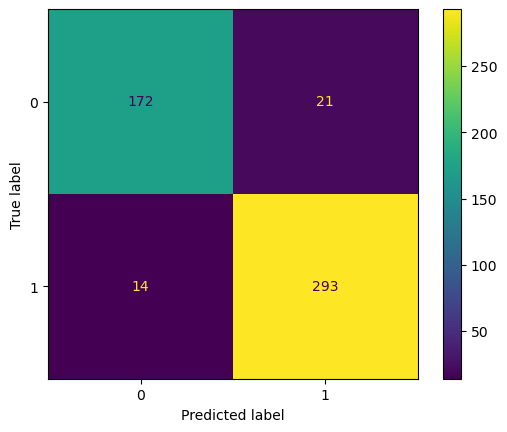

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf) 
# Then just plot it: 
disp.plot() 
# And show it: 
plt.show()

In [48]:
cf_n = confusion_matrix(Y_test, y_pred, normalize = 'all')
cf_n

array([[0.344, 0.042],
       [0.028, 0.586]])

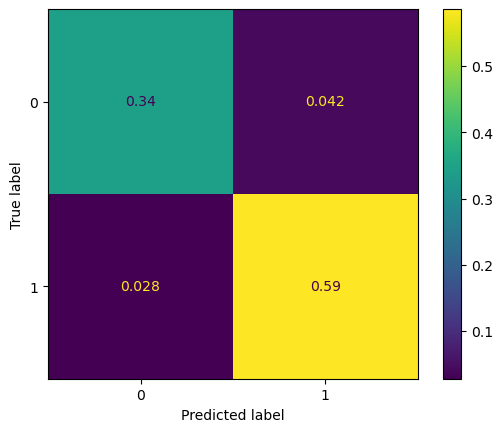

In [49]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf_n) 
# Then just plot it: 
disp.plot() 
# And show it: 
plt.show()

In [50]:
len(Y_test)

500

In [52]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



The value 'support' means how many counts or data are in that class. If the accuracy value is close to the precision and recall, then the class is balanced. 

In [53]:
from sklearn.metrics import precision_score, recall_score

In [55]:
# the overall precision score
precision_score(Y_test, y_pred)

0.9331210191082803

In [56]:
recall_score(Y_test, y_pred)

0.9543973941368078

In [59]:
import sklearn


In [67]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

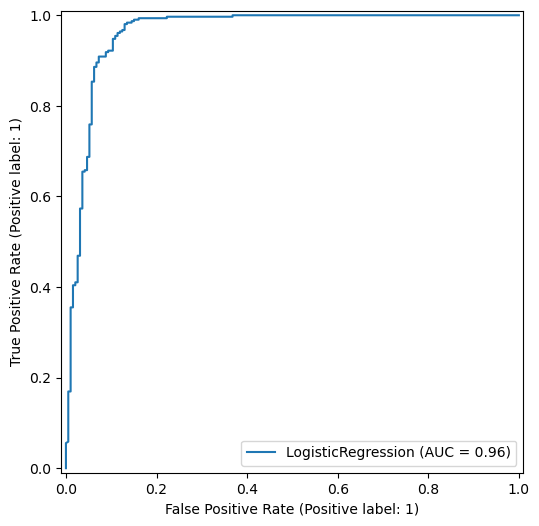

In [80]:
fig, ax = plt.subplots(figsize = (8,6))
RocCurveDisplay.from_estimator(log_model, scaled_X_test, Y_test, ax = ax)

In [81]:
from sklearn.metrics import PrecisionRecallDisplay

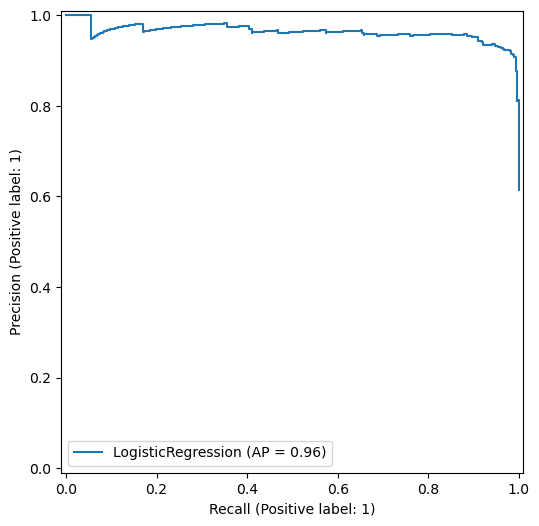

In [85]:
fig, ax = plt.subplots(figsize = (8,6))
PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, Y_test, ax = ax)

In [86]:
log_model.predict_proba(scaled_X_test)[0]

array([0.02380517, 0.97619483])

In [87]:
Y_test[0]

1